# CS 4990
# Assignment 4: Multi-Class Classification, Data Pre-processing, and Model Analysis

# Due: 2:00pm February 27, 2020

In this assignment, you are asked to build an ANN model to classify wines in the "*wines*" dataset into three mutually exclusice classes. Treat the first column in the data set as the target column.

Use __Tutorial 5__ as your reference when working on this assignment.

### 0. The *wines* Dataset and Data Preprocessing


In [8]:
# your code here ... Supervised learning(Artificial NN, Convolutional NN, Recurrant NN)
import pandas as pd 
df = pd.read_csv('./data/wines.csv')
df.tail()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [9]:
X = df.drop('Class', axis=1)
X.head()

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [10]:
targets = df['Class'].unique()
targets

array([1, 2, 3], dtype=int64)

In [18]:
target_dict = {n:i for i, n in enumerate(targets)}
target_dict

{1: 0, 2: 1, 3: 2}

In [19]:
y= df['Class'].map(target_dict)
print(y.head())
print(y.tail())

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64
173    2
174    2
175    2
176    2
177    2
Name: Class, dtype: int64


In [11]:
from tensorflow.keras.utils import to_categorical

In [28]:
y_cat = to_categorical(y)
y_cat[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X.values, y_cat, test_size=0.2,
                     random_state=0, stratify=y)

### 1. Multi-Class Classification Model


In [30]:
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(3, input_dim=13, activation='softmax'))
model.compile(Adam(lr=0.1), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
model.fit(X_train, y_train,
          validation_split=0.1,
          epochs=30, verbose=2);

Train on 127 samples, validate on 15 samples
Epoch 1/30
127/127 - 0s - loss: 240.5125 - acc: 0.1969 - val_loss: 111.0875 - val_acc: 0.1333
Epoch 2/30
127/127 - 0s - loss: 88.6229 - acc: 0.1969 - val_loss: 217.0522 - val_acc: 0.1333
Epoch 3/30
127/127 - 0s - loss: 100.7058 - acc: 0.3701 - val_loss: 211.3839 - val_acc: 0.3333
Epoch 4/30
127/127 - 0s - loss: 87.4811 - acc: 0.5827 - val_loss: 157.7573 - val_acc: 0.4000
Epoch 5/30
127/127 - 0s - loss: 54.0511 - acc: 0.6850 - val_loss: 72.5128 - val_acc: 0.4000
Epoch 6/30
127/127 - 0s - loss: 25.7249 - acc: 0.5039 - val_loss: 22.5436 - val_acc: 0.6000
Epoch 7/30
127/127 - 0s - loss: 16.3967 - acc: 0.5669 - val_loss: 26.6228 - val_acc: 0.3333
Epoch 8/30
127/127 - 0s - loss: 12.8596 - acc: 0.6457 - val_loss: 24.1958 - val_acc: 0.4667
Epoch 9/30
127/127 - 0s - loss: 7.7180 - acc: 0.6220 - val_loss: 13.6674 - val_acc: 0.2667
Epoch 10/30
127/127 - 0s - loss: 9.9114 - acc: 0.5906 - val_loss: 5.4630 - val_acc: 0.6000
Epoch 11/30
127/127 - 0s - loss

In [32]:
y_pred = model.predict(X_test)
y_pred

array([[1.87871562e-29, 9.99999046e-01, 9.24936899e-07],
       [1.00000000e+00, 1.62832414e-10, 5.87566315e-11],
       [1.79091729e-02, 5.38721085e-01, 4.43369776e-01],
       [3.27314995e-02, 3.12601656e-01, 6.54666841e-01],
       [4.13140217e-19, 9.99974847e-01, 2.50972334e-05],
       [9.15929122e-05, 5.17484793e-08, 9.99908447e-01],
       [2.88025930e-15, 1.91324934e-09, 1.00000000e+00],
       [4.79755491e-01, 4.01928604e-01, 1.18315995e-01],
       [1.50969061e-35, 1.00000000e+00, 2.46775211e-10],
       [1.00000000e+00, 1.93227210e-20, 5.31322147e-19],
       [8.25920888e-14, 1.67255827e-08, 1.00000000e+00],
       [2.08287228e-16, 6.64682302e-04, 9.99335349e-01],
       [1.00000000e+00, 0.00000000e+00, 6.41698287e-37],
       [1.74726594e-07, 8.64268726e-11, 9.99999881e-01],
       [6.93955198e-02, 9.29962337e-01, 6.42101746e-04],
       [1.00000000e+00, 8.53284998e-10, 1.19630243e-11],
       [5.48583080e-20, 3.13926762e-07, 9.99999642e-01],
       [1.09482952e-16, 3.37053

### 2. Model Analysis

In [33]:
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       1.00      1.00      1.00        14
           2       0.91      1.00      0.95        10

   micro avg       0.97      0.97      0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix

cm = confusion_matrix(y_test_class, y_pred_class)

pd.DataFrame(cm, index = targets,
             columns = [c for c in targets])

,1,2,3
1,11,0,1
2,0,14,0
3,0,0,10


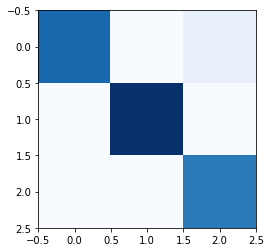

In [37]:
import matplotlib.pyplot as plt

plt.imshow(cm, cmap='Blues');

In [38]:
print('Test accuracy for our ANN model:', \
      round(accuracy_score(y_test_class, y_pred_class)*100, 2),'%')

Test accuracy for our ANN model: 97.22 %


C:\Users\Mathieu Davidson\Anaconda3\envs\CS4990\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Mathieu Davidson\Anaconda3\envs\CS4990\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


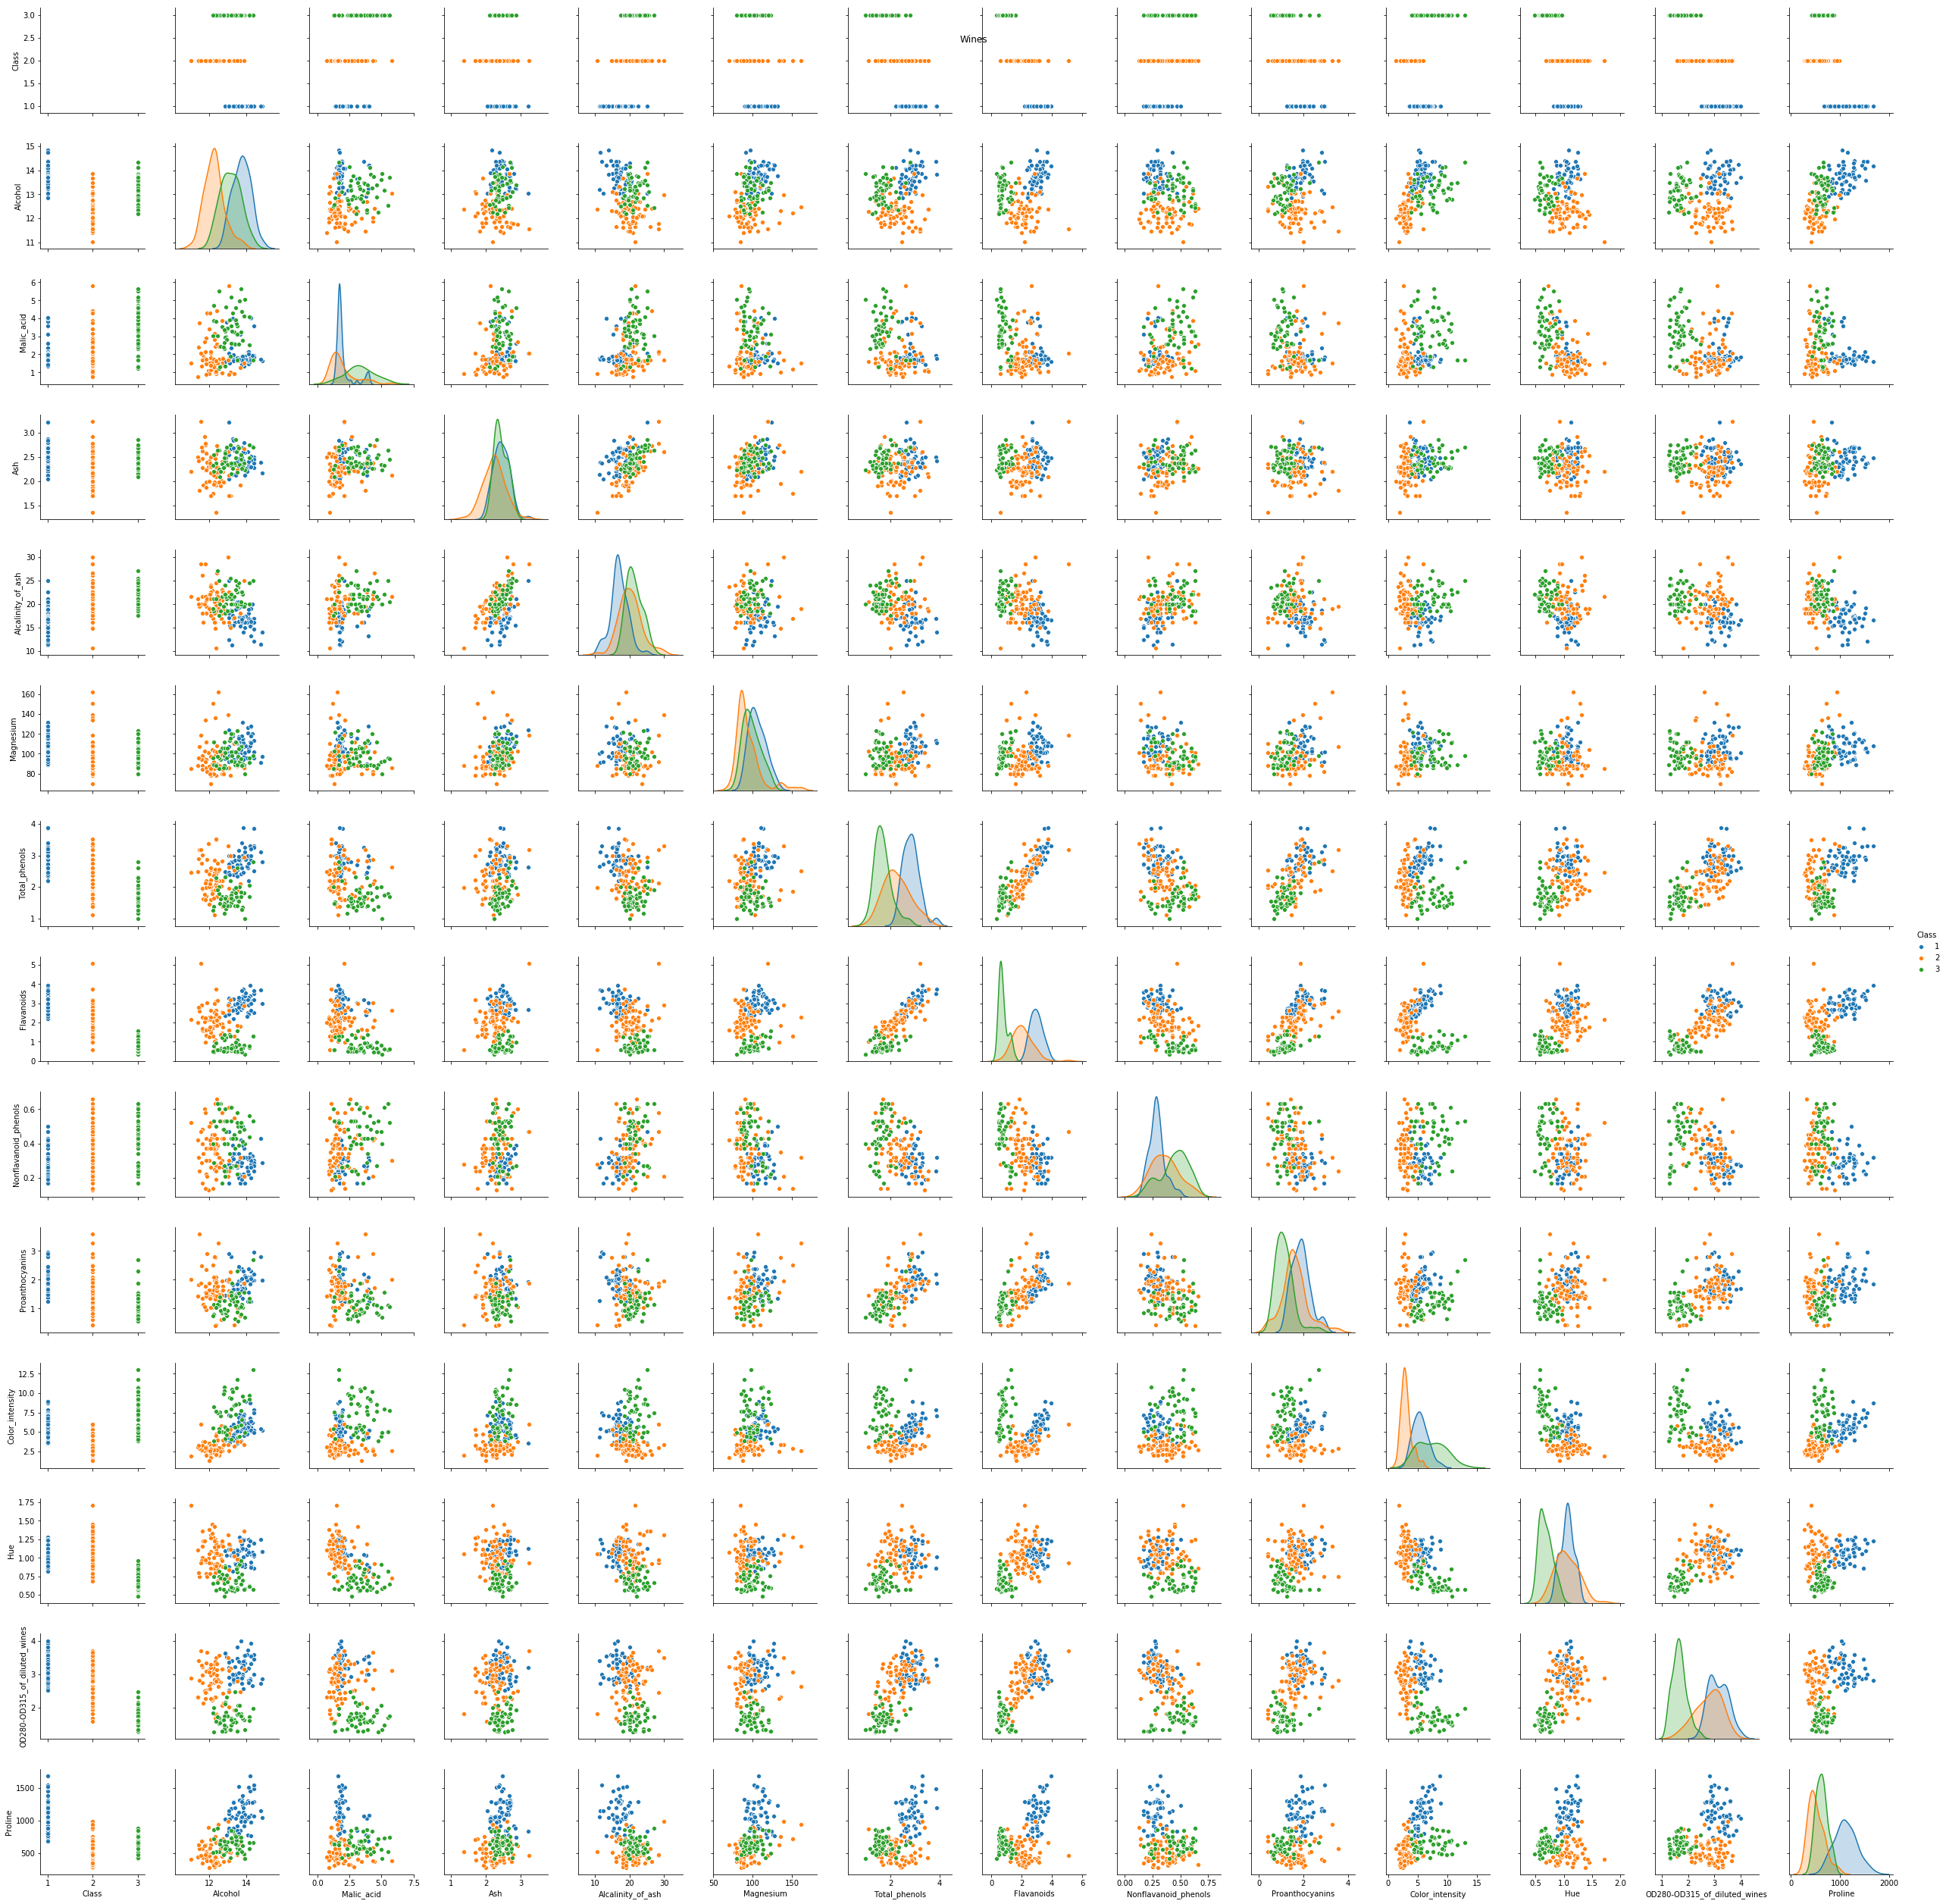

In [40]:
import seaborn as sns

g = sns.pairplot(df, hue="Class")
g.fig.suptitle("Wines");